# **Tutorial for Time Series Analysis of Tesla Stock Data**

For the analysis, we are using tesla stock price data of last 10 years from 2014 Feb 26 to 2025 Feb 26. It was downloaded using yfinance python package and curated into a univariate time series dataset with only 2 columns 'Year' and 'closing_price'.

In [1]:
!conda activate teslafin-env

Classes and functions in teslastocks package and descriptions

There are 4 classes.
- PreProcess
- Summary
- Boxplots
- AdvancedPlots

In [2]:
from src.teslastocks.PreProcess import PreProcess
help(PreProcess)

Help on class PreProcess in module src.teslastocks.PreProcess:

class PreProcess(builtins.object)
 |  PreProcess(dataframe)
 |  
 |  Handles preprocessing of Tesla stock data such as converting year to datetime format, filling missing values and 
 |  removing duplicate values.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataframe)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  handle_missing_values(self)
 |      Handle missing values by filling them with the previous value.
 |  
 |  preprocess(self)
 |      Convert 'Year' column to datetime format, so that it is easy to maintain consistency and
 |      extract month and year.
 |  
 |  remove_duplicates(self)
 |      Remove duplicate rows.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if

In [3]:
from src.teslastocks.Summary import Summary
help(Summary)

Help on class Summary in module src.teslastocks.Summary:

class Summary(builtins.object)
 |  Summary(dataframe)
 |  
 |  Computes numeric statistical descriptors like mean, median, std deviation, minimum, maximum value and quantiles on Tesla stock data.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataframe)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_summary(self)
 |      Returns mean, median, minimum, maximum value, quantiles and standard deviation of the closing price.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [4]:
from src.teslastocks.BoxPlots import Boxplots
help(Boxplots)

Help on class Boxplots in module src.teslastocks.BoxPlots:

class Boxplots(builtins.object)
 |  Boxplots(dataframe)
 |  
 |  This class generates boxplots to analyze Tesla stock data over different time intervals.
 |  The boxplots can visualize the distribution of the 'closing_price' column across various time intervals 
 |  such as days of the week, weeks of the year, months, and years.
 |  
 |  Methods:
 |  - boxplot_daywise: Creates a boxplot for the distribution of closing prices across days of the week.
 |  - boxplot_weeks: Creates a boxplot for the distribution of closing prices across weeks of the year.
 |  - boxplot_monthwise: Creates a boxplot for the distribution of closing prices across months of the year.
 |  - boxplot_years: Creates a boxplot for the distribution of closing prices across different years.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataframe)
 |      Initializes the Boxplots class with a dataframe containing Tesla stock data.
 |      
 |      Par

In [5]:
from src.teslastocks.AdvancedPlots import AdvancedPlots
help(AdvancedPlots)

Help on class AdvancedPlots in module src.teslastocks.AdvancedPlots:

class AdvancedPlots(builtins.object)
 |  AdvancedPlots(dataframe)
 |  
 |  Generates advanced visualizations like seasonal plot, lagsplot and generate autocorrelation value as well for Tesla stock data.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataframe)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  autocorrelation(self, max_lag=10)
 |      Calculate the Autocorrelation Function (ACF) of the closing prices for a range of lags. Autocorrelation measures the 
 |      similarity/correlation to previous lags. It ranges from -1 to 1. 1 indicates that past values strongly influences future
 |      values.
 |      
 |      Parameters:
 |      max_lag (int): Maximum lag value for which to compute ACF
 |      
 |      Returns:
 |      dict: A dictionary with lag values as keys and their corresponding autocorrelation as values
 |  
 |  lag_plot(self, lag=1, num_plots=10)
 |      G

In [7]:
import pandas as pd

tesla = pd.read_csv(r"C:\Users\dhnzc\teslastocks\tesla.csv")  # Use appropriate path
print(tesla.head())



         Year  closing_price
0  2014-02-26      16.866667
1  2014-02-27      16.836000
2  2014-02-28      16.320667
3  2014-03-03      16.704000
4  2014-03-04      16.989332


In [8]:
processor = PreProcess(tesla)

In [9]:
processor.preprocess()


,Year,closing_price,Month,Year_Num
0,2014-02-26,16.866667,2,2014
1,2014-02-27,16.836000,2,2014
2,2014-02-28,16.320667,2,2014
3,2014-03-03,16.704000,3,2014
4,2014-03-04,16.989332,3,2014
...,...,...,...,...
2511,2024-02-16,199.949997,2,2024
2512,2024-02-20,193.759995,2,2024
2513,2024-02-21,194.770004,2,2024
2514,2024-02-22,197.410004,2,2024


In [10]:
processor.handle_missing_values()
processor.remove_duplicates()

,Year,closing_price,Month,Year_Num
0,2014-02-26,16.866667,2,2014
1,2014-02-27,16.836000,2,2014
2,2014-02-28,16.320667,2,2014
3,2014-03-03,16.704000,3,2014
4,2014-03-04,16.989332,3,2014
...,...,...,...,...
2511,2024-02-16,199.949997,2,2024
2512,2024-02-20,193.759995,2,2024
2513,2024-02-21,194.770004,2,2024
2514,2024-02-22,197.410004,2,2024


In [11]:
from src.teslastocks.Summary import Summary

In [12]:
processed_df = processor.preprocess()


In [13]:

stats = Summary(processed_df)  

In [14]:
print(stats.get_summary())

{'Mean': 96.91467644491652, 'Median': 22.31900024, 'Std Dev': 108.86831640333976, 'Min': 9.578000069, 'Max': 409.9700012, 'Quantiles': {0.25: 16.0799999225, 0.5: 22.31900024, 0.75: 203.34083555}}


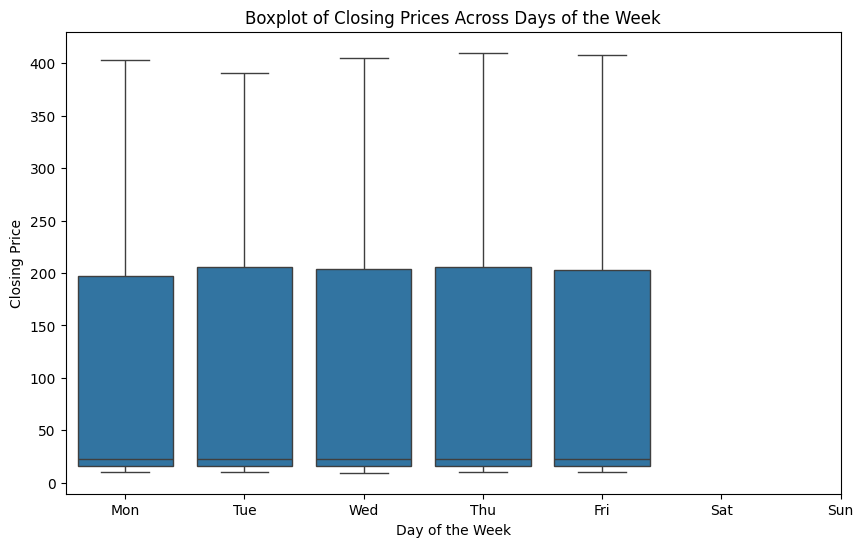

In [15]:
box=Boxplots(processed_df)
box.boxplot_daywise()

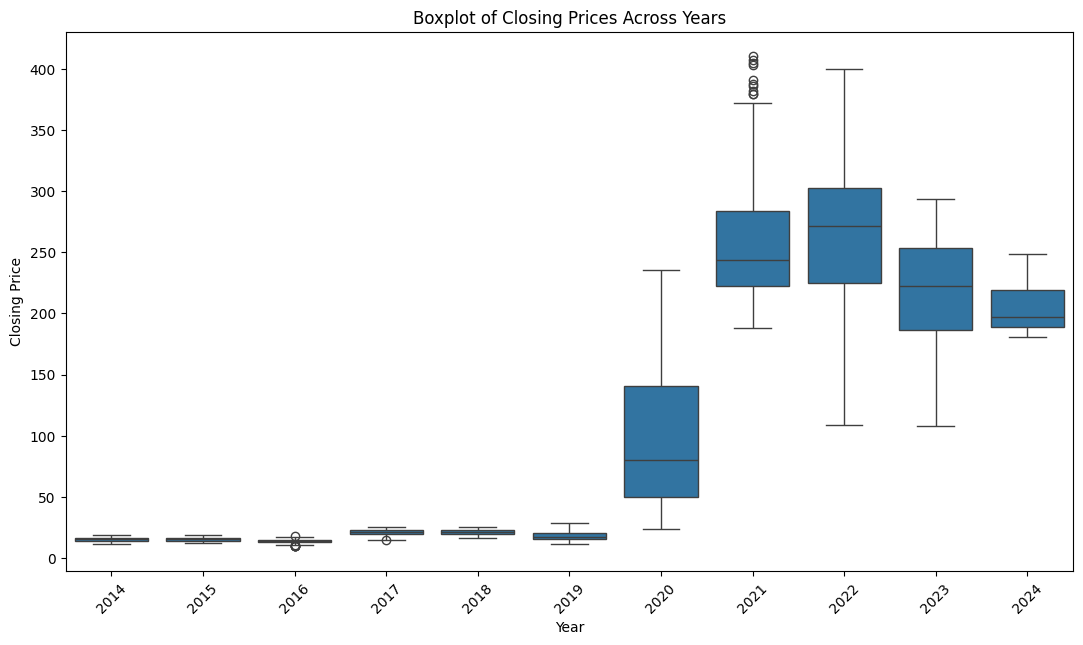

In [22]:
box.boxplot_years()

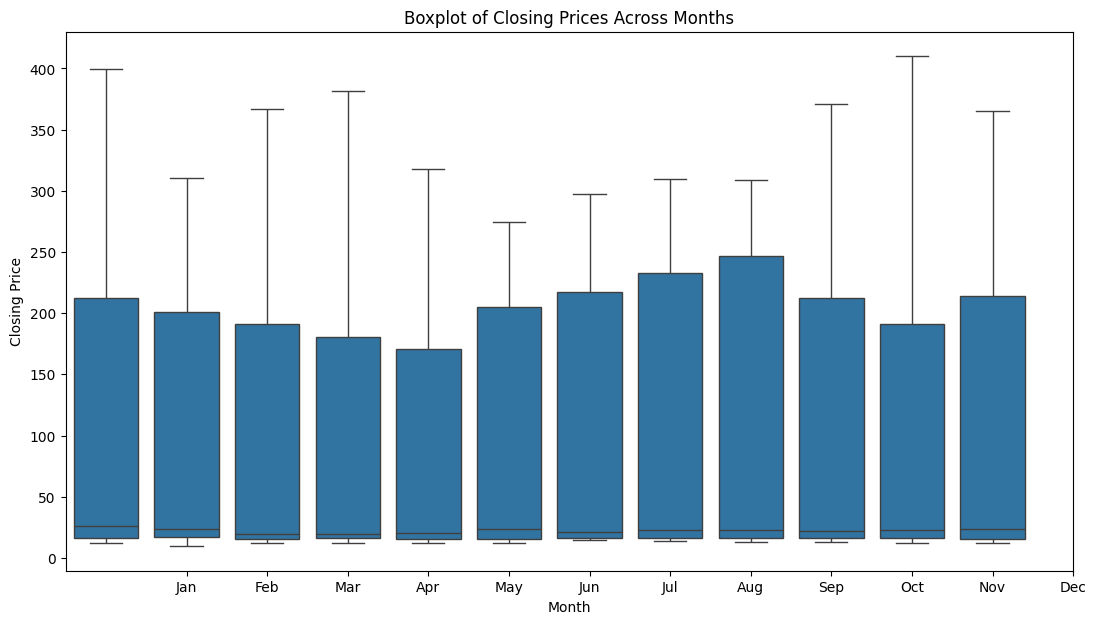

In [23]:
box.boxplot_monthwise()

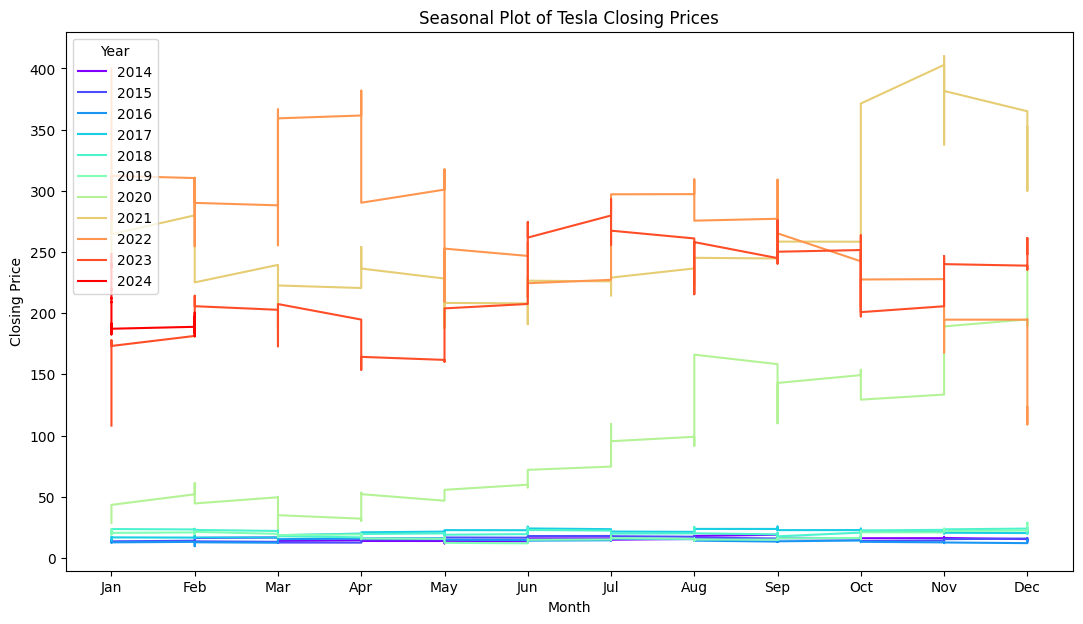

In [24]:
viz = AdvancedPlots(processed_df)
viz.seasonal_plot()

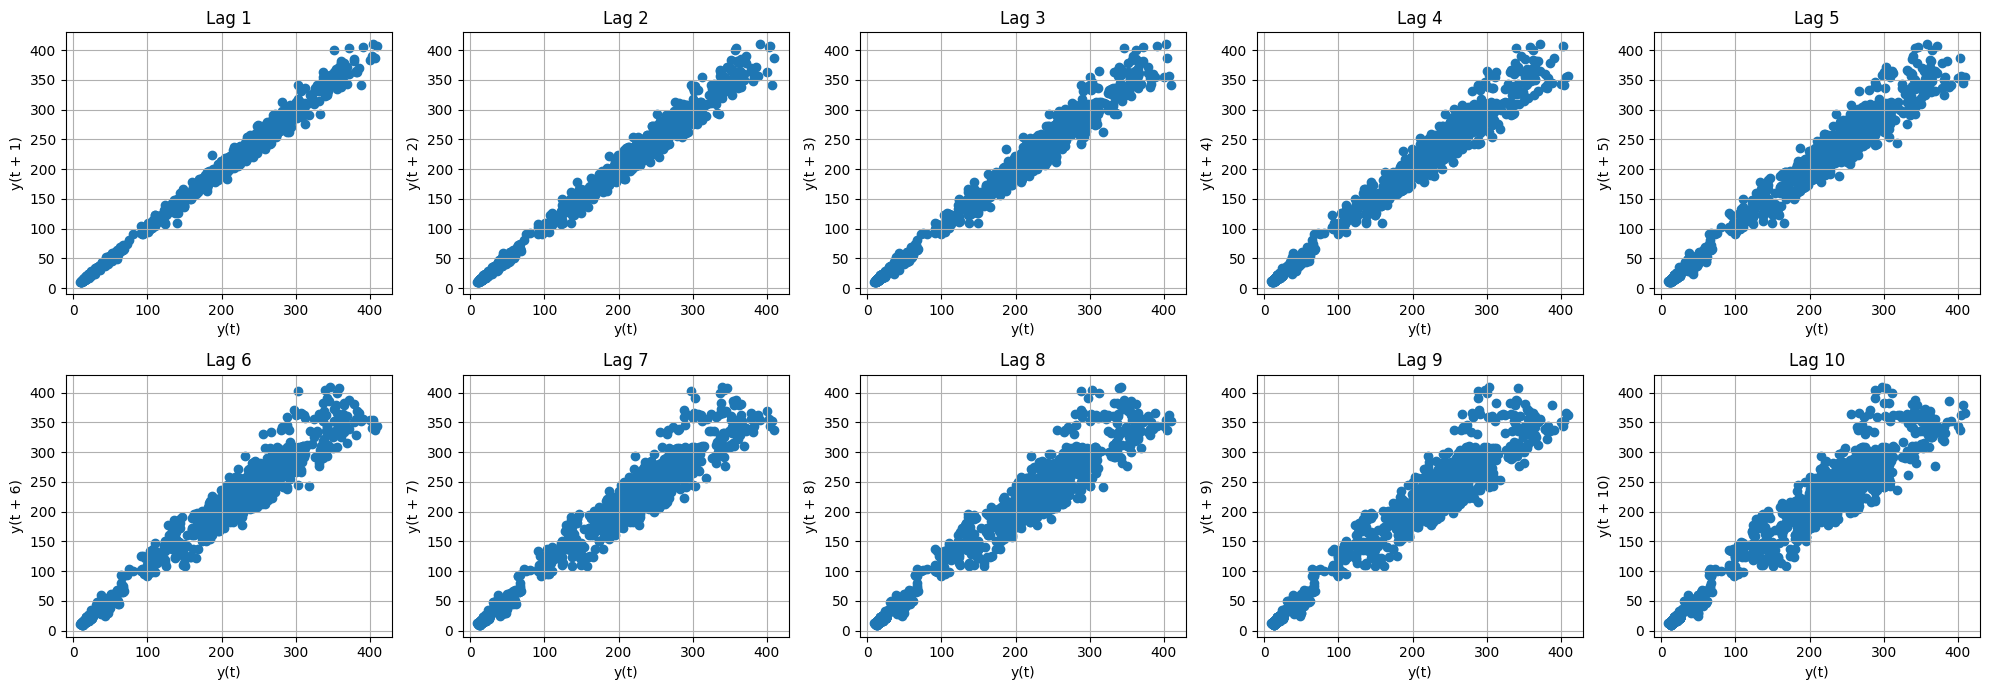

In [25]:

viz.lag_plot(lag=1, num_plots=10)  # Create lag plots for lags 1 to 10



In [26]:
acf_result = viz.autocorrelation(max_lag=10)
print("Autocorrelation (ACF) for closing_price:", acf_result)

Autocorrelation (ACF) for closing_price: {1: 0.9987378827625913, 2: 0.9975474882888228, 3: 0.9963295481417128, 4: 0.9951304352573325, 5: 0.9937728785009934, 6: 0.9924623539753372, 7: 0.9911426546860358, 8: 0.9895997459210389, 9: 0.9881601237340547, 10: 0.9865090640534526}
